In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
data=pd.read_csv('/Users/gauravtyagi/Downloads/data/LANL-Earthquake-Prediction/train.csv',nrows=50000)


In [12]:
data.time_to_failure.nunique()

50000

In [13]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM

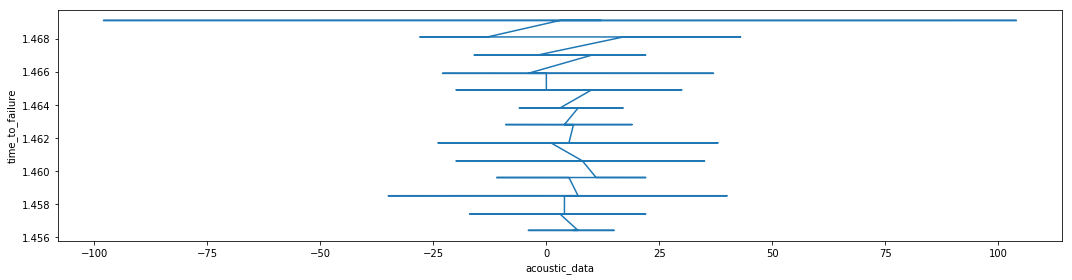

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))
plt.plot(data.acoustic_data, data.time_to_failure)
plt.xlabel('acoustic_data')
plt.ylabel('time_to_failure')
plt.tight_layout()
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
nout = 100
ninp = 100

In [17]:
def _load_data(data, n_prev = ninp+nout-1):
    """
    data should be pd.DataFrame()
    """

    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data.iloc[i:i+n_prev-nout+1].values)
        docY.append(data.iloc[i+n_prev-nout+1:i+n_prev+1].values)
    matX = np.array(docX)
    matY = np.array(docY)

    return matX, matY

def train_test_split(df, test_size=0.1):  
    """
    This just splits data to training and testing parts
    """
    ntrn = int(round(len(df) * (1 - test_size)))
    print(ntrn)
    X_train, y_train = _load_data(df.iloc[0:ntrn])
    X_test, y_test = _load_data(df.iloc[ntrn:])
    return (X_train, y_train), (X_test, y_test)

# retrieve data
(X_train, y_train), (X_test, y_test) = train_test_split(data)

45000


In [18]:
y_test=np.squeeze(y_test)
y_train=np.squeeze(y_train)
print (X_train.shape,y_train.shape)

(44801, 100, 2) (44801, 100, 2)


In [19]:
y_train.shape

(44801, 100, 2)

In [20]:

# define model structure
in_neurons = 1
out_neurons=10
hidden_neurons = 300
model = Sequential()
model.add(LSTM(input_dim=in_neurons, output_dim=hidden_neurons, return_sequences=False))
model.add(Dense(output_dim=out_neurons))
model.add(Activation("linear"))
model.compile(loss="mean_squared_error", optimizer="rmsprop")

/Users/gauravtyagi/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  import sys
/Users/gauravtyagi/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=False, input_shape=(None, 1), units=300)`
  import sys
/Users/gauravtyagi/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=10)`
  


In [21]:
model.fit(X_train, y_train, batch_size=50, nb_epoch=10, validation_split=0.05)


/Users/gauravtyagi/anaconda3/envs/myenv/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


ValueError: Error when checking input: expected lstm_1_input to have shape (None, 1) but got array with shape (100, 2)